In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [63]:
df = pd.read_csv('Data/Large_Datasets/4-wayHeterogeneous_100000feat.txt', delimiter='\t')
df

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N99991,N99992,N99993,N99994,N99995,M0P1,M1P2,M2P3,M3P4,Class
0,0,0,0,0,1,1,0,1,0,1,...,0,0,1,1,1,0,0,0,1,1
1,0,1,1,2,0,1,2,0,0,1,...,0,0,0,1,0,0,1,0,1,1
2,0,0,1,0,1,0,1,2,1,1,...,2,0,0,1,0,0,0,2,1,1
3,0,1,1,1,0,1,0,1,0,1,...,1,1,0,1,1,0,1,0,1,1
4,0,1,2,0,1,1,1,0,0,0,...,2,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,2,0,1,...,0,0,0,1,1,0,0,0,1,0
996,0,0,0,1,0,0,0,1,0,0,...,2,0,1,2,0,0,1,1,0,0
997,0,1,0,0,1,0,1,1,1,0,...,1,1,0,1,1,0,0,0,1,0
998,0,1,2,0,0,0,2,2,0,1,...,1,0,0,2,0,0,1,0,0,0


In [64]:
X = df[['M0P1', 'M1P2', 'M2P3', 'M3P4']]
X

,M0P1,M1P2,M2P3,M3P4
0,0,0,0,1
1,0,1,0,1
2,0,0,2,1
3,0,1,0,1
4,0,1,0,0
...,...,...,...,...
995,0,0,0,1
996,0,1,1,0
997,0,0,0,1
998,0,1,0,0


In [65]:
y = df[['Class']]
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(4,)),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])


/opt/anaconda3/envs/nn/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.6090 - loss: 0.6514 - val_accuracy: 0.6375 - val_loss: 0.6192
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.7112 - loss: 0.5566 - val_accuracy: 0.5875 - val_loss: 0.6146
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.6971 - loss: 0.5537 - val_accuracy: 0.5875 - val_loss: 0.6080
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.7196 - loss: 0.5470 - val_accuracy: 0.6750 - val_loss: 0.6394
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.7079 - loss: 0.5462 - val_accuracy: 0.6250 - val_loss: 0.6235
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.6963 - loss: 0.5673 - val_accuracy: 0.6000 - val_loss: 0.6022
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.6920 - loss: 0.5687 - val_accuracy: 0.5875 - val_loss: 0.6082
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7531 - loss: 0.5223 - val_accuracy: 0.

In [71]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
test_acc

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.6741 - loss: 0.5737


0.6899999976158142

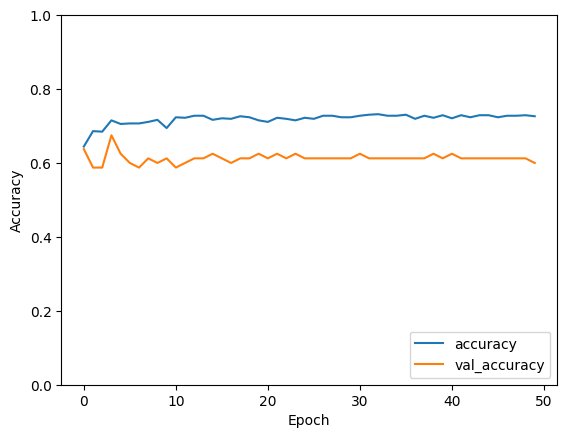

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()